# Keras API Project Exercise

## The Data

A subset of the LendingClub DataSet obtained from Kaggle will be used: https://www.kaggle.com/wordsforthewise/lending-club

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), the goal is to build a model that can predict wether or nor a borrower will pay back their loan

### Data Overview


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

## Imports and Initial partitioning of data

In [417]:
import pandas as pd

In [418]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [419]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [420]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [421]:
feat_info('mort_acc')

Number of mortgage accounts.


In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [423]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

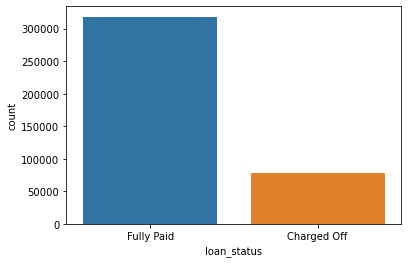

In [425]:
sns.countplot(x="loan_status", data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

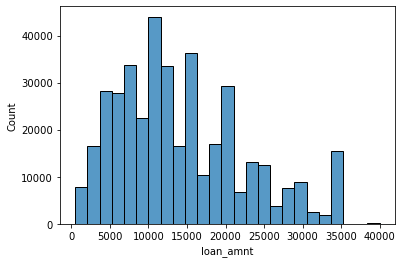

In [426]:
sns.histplot(x="loan_amnt",data=df,bins=25)

In [427]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

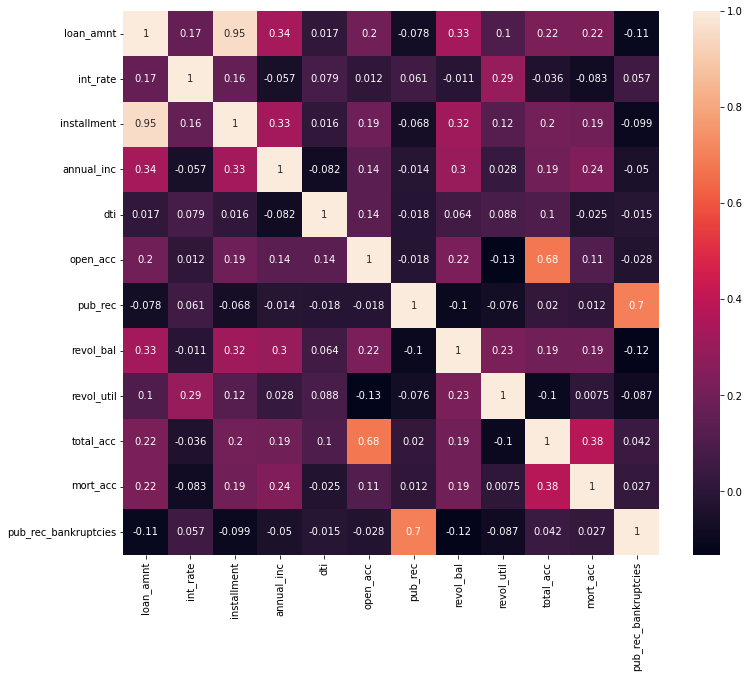

In [428]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

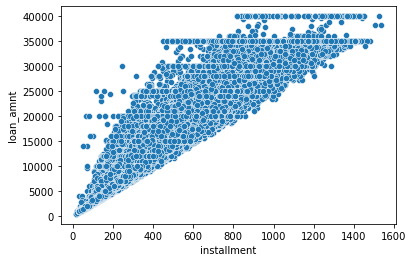

In [429]:
sns.scatterplot(x="installment",y="loan_amnt",data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

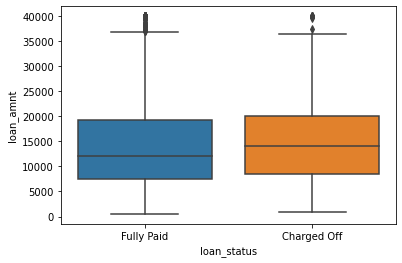

In [430]:
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

In [431]:
df.groupby("loan_status").describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [432]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [433]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

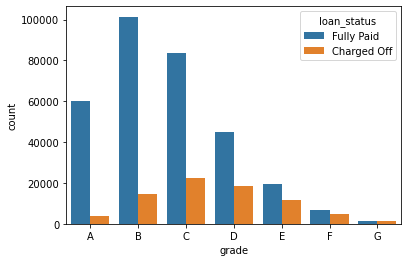

In [434]:
sns.countplot(x="grade",data=df,hue="loan_status",order=["A","B","C","D","E","F","G"])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

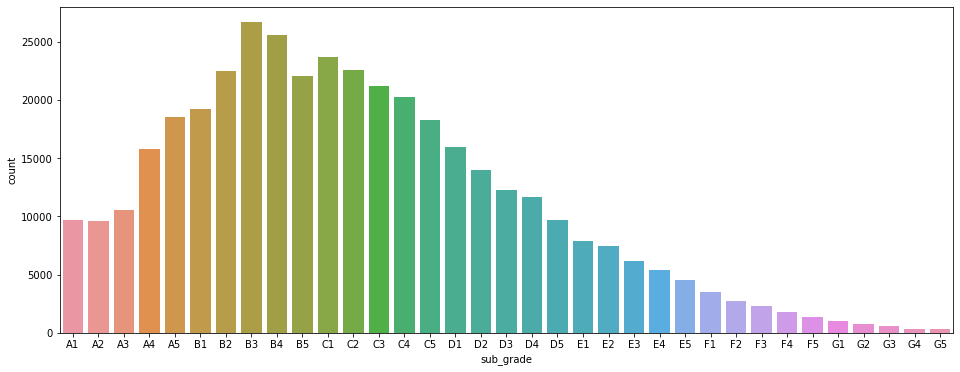

In [435]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x="sub_grade",data=df,order=["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5",])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

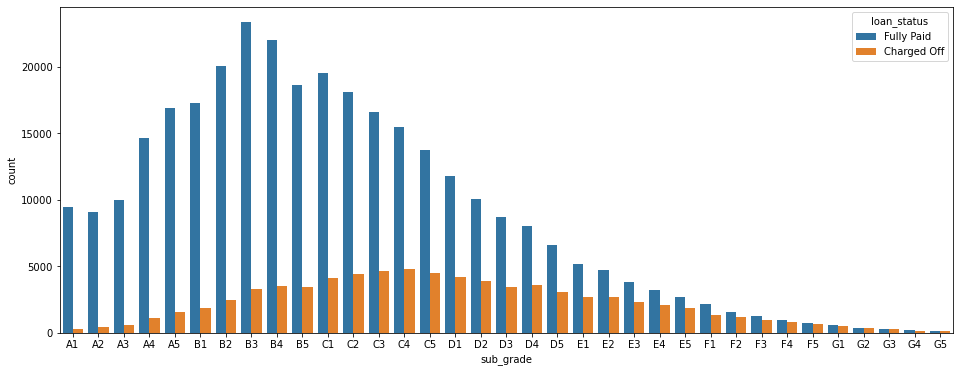

In [436]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x="sub_grade",data=df,hue="loan_status",order=["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5",])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

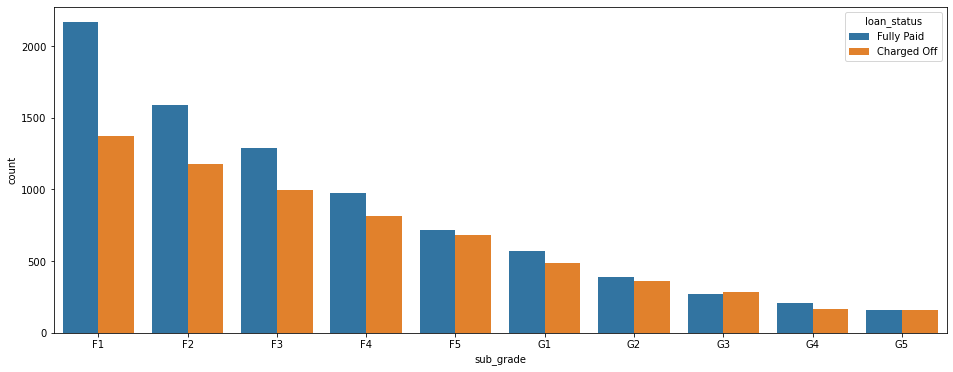

In [437]:
def getFandG(x):
    if "F" in x or "G" in x:
        return True
    else:
        return False

fig, ax = plt.subplots(figsize=(16,6))
dflasts = df[df["sub_grade"].apply(getFandG)]
sns.countplot(x="sub_grade",data=dflasts,hue="loan_status",order=["F1","F2","F3","F4","F5","G1","G2","G3","G4","G5",])

In [438]:
df["loan_status"].head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

In [439]:
def convertStatus(x):
    if "Fully Paid" == x:
        return 1
    else:
        return 0


df["loan_repaid"] = df["loan_status"].apply(convertStatus)
df[["loan_repaid","loan_status"]].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

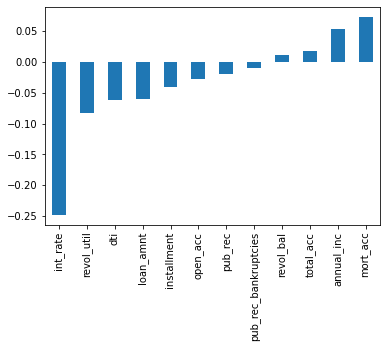

In [440]:

df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

#  Data PreProcessing

# Dealing With Missing Data


In [441]:
len(df)

396030

In [442]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [443]:
df2 = df.isnull().sum()/396030
df2*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [444]:
 feat_info("emp_title")

The job title supplied by the Borrower when applying for the loan.*


In [445]:
 feat_info("emp_length")

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [446]:
len(df["emp_title"].unique())

173106

In [447]:
df = df.drop("emp_title",axis=1)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

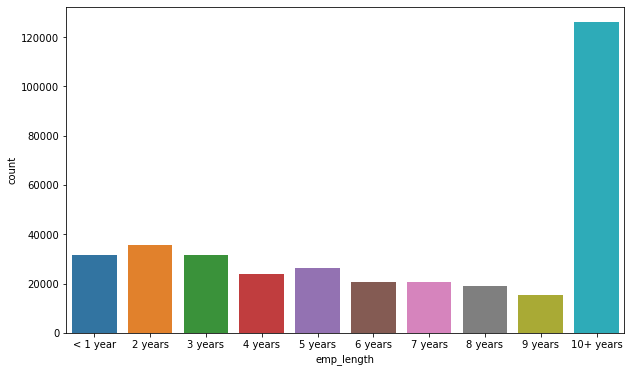

In [448]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="emp_length",data=df,order=["< 1 year","2 years","3 years","4 years","5 years","6 years","7 years","8 years","9 years","10+ years",])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

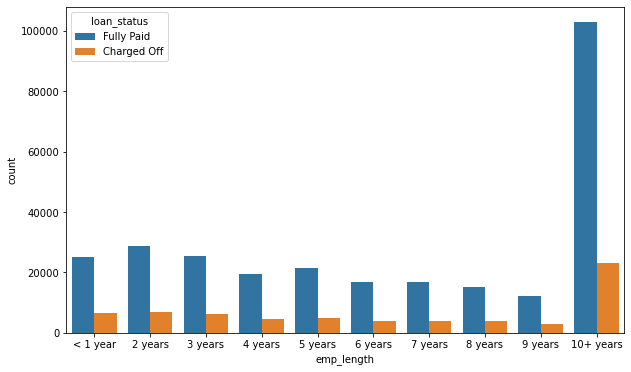

In [449]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="emp_length",data=df,hue="loan_status",order=["< 1 year","2 years","3 years","4 years","5 years","6 years","7 years","8 years","9 years","10+ years",])

In [450]:
df = df.drop("emp_length",axis=1)

In [451]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [452]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [453]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [454]:
df = df.drop("title",axis=1)

## Dealing with some other data treatment

In [455]:
feat_info('mort_acc')

Number of mortgage accounts.


In [456]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [457]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [458]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [459]:
total_avg = df.groupby('total_acc').mean()['mort_acc']

In [460]:
def fill_values(total_a,mort_a):
  
    if np.isnan(mort_a):
        return total_avg[total_a]
    else:
        return mort_a

    
df['mort_acc'] = df.apply(lambda x: fill_values(x['total_acc'], x['mort_acc']), axis=1)

In [461]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

## Categorical Variables and Dummy Variables

In [465]:
df = df.drop('grade',axis=1)

In [466]:
def convert(x):
    return int(x[:3])
df['term'] = df['term'].apply(convert)

In [467]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [468]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [470]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [471]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [472]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [474]:
def getadd(x):
    return x[-5:]

df['zip_code'] = df['address'].apply(getadd)

In [475]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [476]:
df = df.drop('issue_d',axis=1)

In [477]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

## Train Test Split

In [478]:
from sklearn.model_selection import train_test_split

In [479]:
df = df.drop('loan_status',axis=1)

In [483]:
df['revol_util'] = df['revol_util'].replace(np.nan, df["revol_util"].mean())
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].replace(np.nan, df["pub_rec_bankruptcies"].mean())
X = df.drop("loan_repaid",axis=1)

y = df["loan_repaid"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)


## Normalizing the Data

In [484]:
from sklearn.preprocessing import MinMaxScaler

In [485]:
scaler = MinMaxScaler()

In [486]:
scaler.fit(X_train)

MinMaxScaler()

In [487]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [488]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [491]:
model = Sequential()

model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [492]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=30,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2765 - val_loss: 0.2602
Epoch 2/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2633 - val_loss: 0.2600
Epoch 3/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2626 - val_loss: 0.2608
Epoch 4/30
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2621 - val_loss: 0.2602
Epoch 5/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2615 - val_loss: 0.2589
Epoch 6/30
9901/9901 [==============================] - 17s 2ms/step - loss: 0.2612 - val_loss: 0.2595
Epoch 7/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2612 - val_loss: 0.2595
Epoch 8/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2609 - val_loss: 0.2590
Epoch 9/30
9901/9901 [==============================] - 18s 2ms/step - loss: 0.2607 - val_loss: 0.2582
Epoch 10/30
9901/9901 [==============================] - 18s 2ms/step - l

In [493]:
from tensorflow.keras.models import load_model

In [494]:
model.save('loan_prediction_model.h5')  

# Evaluating Model Performance.

<AxesSubplot:>

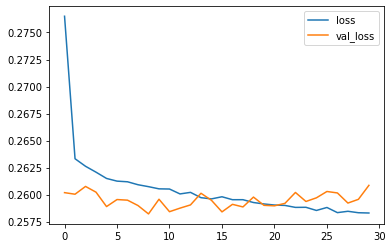

In [495]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [498]:
from sklearn.metrics import classification_report,confusion_matrix

In [508]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [509]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [510]:
print(confusion_matrix(y_test,predictions))

[[ 6743  8750]
 [   44 63669]]


Testing with a single person

In [511]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.00
term                   60.00
int_rate               13.11
installment           547.43
annual_inc          85000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 304691, Length: 78, dtype: float64

In [514]:

predictions = (model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

In [515]:
predictions

array([[1]])

Now checking the results

In [516]:
df.iloc[random_ind]['loan_repaid']

1.0